<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1AI%E6%AF%94%E8%B3%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 原始資料

In [2]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train.csv")
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
train.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

0    1501432
1      20355
Name: fraud_ind, dtype: int64

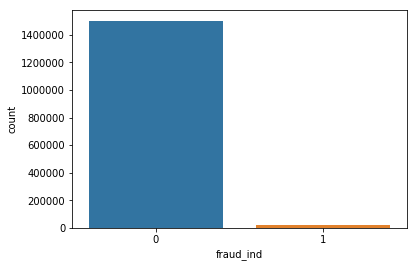

In [4]:
import seaborn as sns
sns.countplot(train['fraud_ind'])
train['fraud_ind'].value_counts()

# 處理樣本問題

In [0]:
#沒被盜刷樣本 = train[train['fraud_ind']==0].sample(20355)
#被盜刷樣本 = train[train['fraud_ind']==1]
#train = pd.concat([沒被盜刷樣本,被盜刷樣本],axis=0)
#train = train.reset_index(drop=True)
#處理完畢看一下
#sns.countplot(train['fraud_ind'])
#train['fraud_ind'].value_counts()

In [6]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test.csv")
print(test.shape)
test_txkey = test["txkey"]
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215311.0,457,59360,N,0,102,0,592488


In [7]:
test.isnull().sum()

acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3715
flg_3dsmk    3715
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64

# fill na

In [0]:
train['flbmk'] = train['flbmk'].fillna('unknown')
train['flg_3dsmk'] = train['flg_3dsmk'].fillna('unknown')
test['flbmk'] = test['flbmk'].fillna('unknown')
test['flg_3dsmk'] = test['flg_3dsmk'].fillna('unknown')

# 提出問題&基本假設

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

def Query_frequency(data,col):
  fraud_ind_total = data[data.fraud_ind == 1][col].value_counts()
  record_total = data[col].value_counts()
  Probability = fraud_ind_total/record_total
  return Probability.fillna(0)

# 根據不同條件觀察盜刷發生機率

In [0]:
y_name = 'fraud_ind'

count    6051.000000
mean        0.022273
std         0.107733
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: acqic, dtype: float64
6051


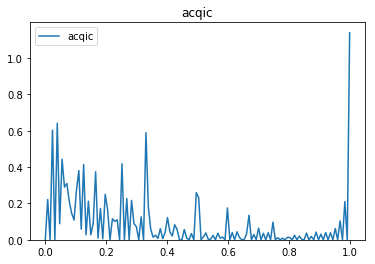

count    95214.000000
mean         0.015625
std          0.082935
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: bacno, dtype: float64
95214


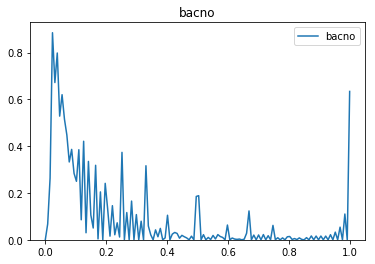

count    129413.000000
mean          0.021783
std           0.113456
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cano, dtype: float64
129413


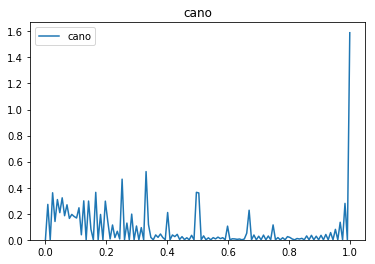

count    72961.000000
mean         0.064431
std          0.229286
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: conam, dtype: float64
72961


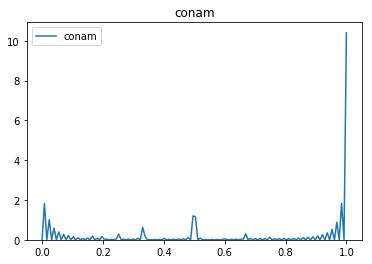

count    7.000000
mean     0.004606
std      0.006071
min      0.000000
25%      0.000060
50%      0.000221
75%      0.008812
max      0.014274
Name: contp, dtype: float64
7


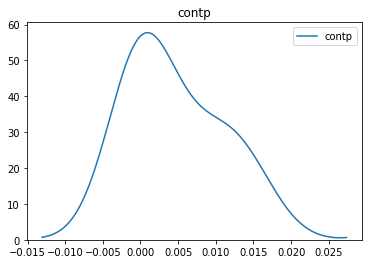

count    72.000000
mean      0.105213
std       0.215806
min       0.000000
25%       0.000000
50%       0.011507
75%       0.089204
max       1.000000
Name: csmcu, dtype: float64
72


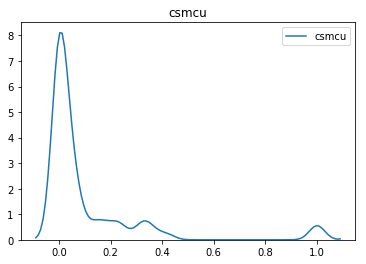

count    2.000000
mean     0.023846
std      0.030156
min      0.002523
25%      0.013184
50%      0.023846
75%      0.034508
max      0.045169
Name: ecfg, dtype: float64
2


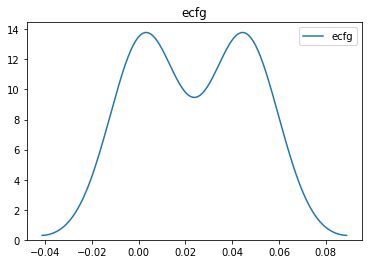

count    11.000000
mean      0.041164
std       0.087094
min       0.000000
25%       0.000977
50%       0.005652
75%       0.034037
max       0.293860
Name: etymd, dtype: float64
11


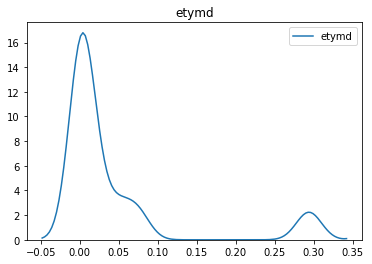

count    3.000000
mean     0.015331
std      0.001908
min      0.013345
25%      0.014422
50%      0.015500
75%      0.016325
max      0.017150
Name: flbmk, dtype: float64
3


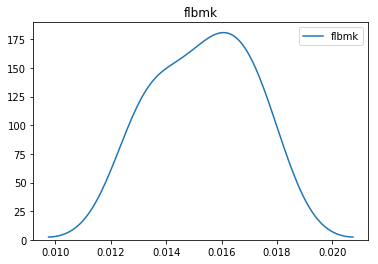

count    3.000000
mean     0.010312
std      0.007628
min      0.001554
25%      0.007719
50%      0.013884
75%      0.014692
max      0.015500
Name: flg_3dsmk, dtype: float64
3


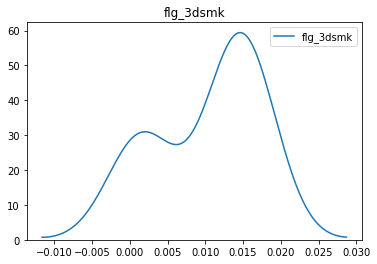

count    9.000000
mean     0.003684
std      0.006390
min      0.000000
25%      0.000000
50%      0.000389
75%      0.002237
max      0.015500
Name: hcefg, dtype: float64
9


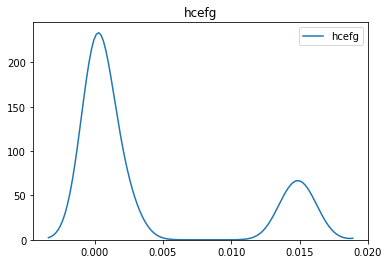

count    2.000000
mean     0.007304
std      0.009093
min      0.000874
25%      0.004089
50%      0.007304
75%      0.010519
max      0.013733
Name: insfg, dtype: float64
2


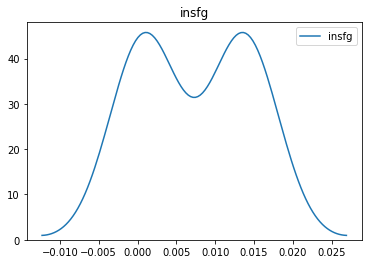

count    9.000000
mean     0.001828
std      0.004525
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000372
max      0.013733
Name: iterm, dtype: float64
9


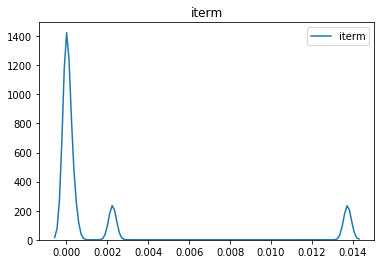

count    90.000000
mean      0.013479
std       0.005149
min       0.006295
25%       0.010371
50%       0.012089
75%       0.015014
max       0.035754
Name: locdt, dtype: float64
90


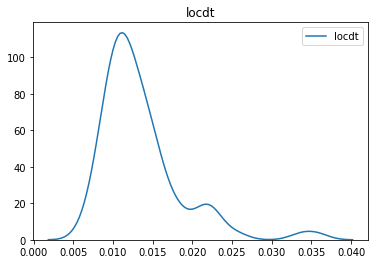

count    84810.000000
mean         0.026947
std          0.094703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loctm, dtype: float64
84810


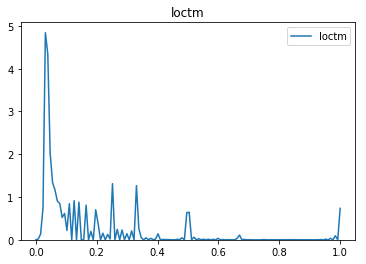

count    434.000000
mean       0.046037
std        0.144873
min        0.000000
25%        0.000000
50%        0.000000
75%        0.016462
max        1.000000
Name: mcc, dtype: float64
434


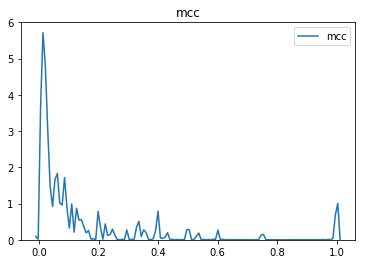

count    89316.000000
mean         0.013647
std          0.107541
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: mchno, dtype: float64
89316


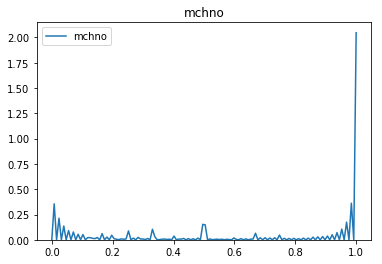

count    2.000000
mean     0.022245
std      0.012886
min      0.013133
25%      0.017689
50%      0.022245
75%      0.026801
max      0.031356
Name: ovrlt, dtype: float64
2


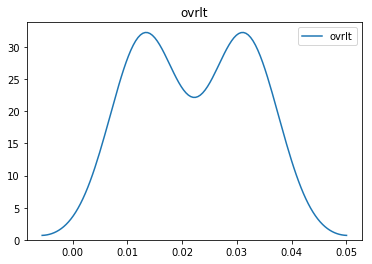

count    5698.000000
mean        0.101038
std         0.269220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: scity, dtype: float64
5698


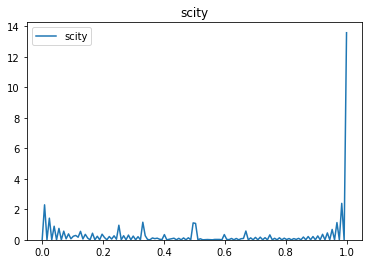

count    103.000000
mean       0.092898
std        0.190793
min        0.000000
25%        0.000000
50%        0.013699
75%        0.083597
max        1.000000
Name: stocn, dtype: float64
103


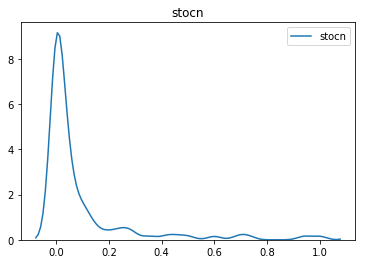

count    5.000000
mean     0.075281
std      0.131110
min      0.000000
25%      0.000000
50%      0.009768
75%      0.061275
max      0.305360
Name: stscd, dtype: float64
5


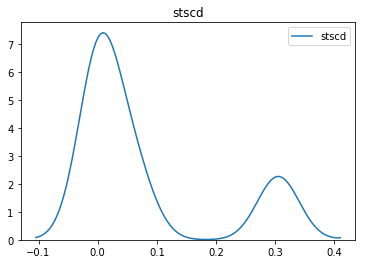

count    1.521787e+06
mean     1.337572e-02
std      1.148774e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: txkey, dtype: float64
1521787


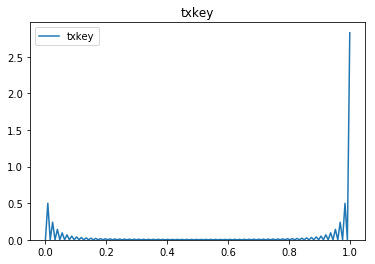

In [11]:
for col in train.drop(y_name,axis=1).columns:
  print(Query_frequency(train,col).describe())
  print(len(train[col].unique()))
  sns.kdeplot(Query_frequency(train,col))
  plt.title(col)
  plt.show()

# 特徵工程

In [12]:
x_columns = train.drop(y_name,axis=1).columns.tolist()
print(len(x_columns))

22


In [0]:
for col in x_columns:
  P = Query_frequency(train,col)
  train[col] = train[col].map(P)
  test[col] = test[col].map(P)

# select columns

In [14]:
features = set(train.columns[train.isnull().sum()==0])&set(test.columns[test.isnull().sum()==0])
features = list(features)
print(features)
print(y_name)

['etymd', 'flg_3dsmk', 'flbmk', 'stscd', 'insfg', 'iterm', 'ovrlt', 'ecfg', 'contp']
fraud_ind


In [15]:
train = train[features+[y_name]]
test = test[features]
print(train.shape)
print(train.head())
print(test.shape)
print(test.head())

(1521787, 10)
      etymd  flg_3dsmk     flbmk  ...      ecfg     contp  fraud_ind
0  0.001407   0.013884  0.013345  ...  0.002523  0.014274          0
1  0.020664   0.013884  0.013345  ...  0.002523  0.014274          0
2  0.001407   0.013884  0.013345  ...  0.002523  0.014274          0
3  0.000502   0.013884  0.013345  ...  0.002523  0.014274          0
4  0.000546   0.013884  0.013345  ...  0.002523  0.014274          0

[5 rows x 10 columns]
(421665, 9)
      etymd  flg_3dsmk     flbmk  ...     ovrlt      ecfg     contp
0  0.001407   0.013884  0.013345  ...  0.013133  0.002523  0.014274
1  0.001407   0.013884  0.013345  ...  0.013133  0.002523  0.014274
2  0.001407   0.013884  0.013345  ...  0.013133  0.002523  0.014274
3  0.001407   0.013884  0.013345  ...  0.013133  0.002523  0.014274
4  0.001407   0.013884  0.013345  ...  0.013133  0.002523  0.014274

[5 rows x 9 columns]


# standscaler

In [0]:
#from sklearn.preprocessing import StandardScaler
#def scaler
#scaler = StandardScaler()
#scaler.fit(train[features])

#transform
#train[features] = scaler.transform(train[features])
#test[features] = scaler.transform(test[features])

#print result
#print(train.head())
#print(test.head())

# X,y split

In [0]:
from sklearn.model_selection import train_test_split
X = train[features]
y = train[y_name]

# 調整採樣平衡

In [18]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X平衡 ,y平衡 = ros.fit_sample(X,y)
print(pd.Series(y平衡).value_counts())
X = pd.DataFrame(X平衡,columns=X.columns)
y = pd.Series(y平衡,name=y.name)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    20355
0    20355
dtype: int64


# train_val split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling

In [20]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective="reg:squarederror")
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
xgbc.score(X_val,y_val)

0.8553181036600344

In [22]:
y_pred = xgbc.predict(X_val)
pd.Series(y_pred).value_counts()

1    4460
0    3682
dtype: int64

# report

In [23]:
from sklearn.metrics import classification_report 
target_names = ['0','1']
print(classification_report(y_val,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4030
           1       0.83      0.90      0.86      4112

    accuracy                           0.86      8142
   macro avg       0.86      0.85      0.85      8142
weighted avg       0.86      0.86      0.85      8142



# 產生submission

In [24]:
final_pred = xgbc.predict(test)

submission = pd.DataFrame()
submission["txkey"] = test_txkey
submission["fraud_ind"] = final_pred
submission.head()

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0


In [0]:
submission.to_csv("./submission_4.csv")

In [26]:
print(submission["fraud_ind"].value_counts())

0    332870
1     88795
Name: fraud_ind, dtype: int64
